In [24]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import mysql.connector

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
try:
    conexion = mysql.connector.connect(
        host='212.227.90.6',
        user='Equipo16',
        password='E1q2u3i4p5o16',
        database='Equip_16')

    cursor = conexion.cursor()
    print("✅ Conexión exitosa a la base de datos.")

    # Función para cargar tablas
    def cargar_tabla(nombre_tabla):
        cursor.execute(f"SELECT * FROM {nombre_tabla}")
        return pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

    # Cargar tablas
    df_bank = cargar_tabla("BANK_marketing22092025")

    cursor.close()
    conexion.close()

except mysql.connector.Error as err:
    print(f"❌ Error de conexión a la base de datos: {err}")

df_bank.to_csv(r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Perfil de cliente\eda_raw_23092025.csv", index=False)

✅ Conexión exitosa a la base de datos.


Ino general del dataset

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16172 entries, 0 to 16171
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         16172 non-null  int64  
 1   age        16155 non-null  float64
 2   job        16172 non-null  object 
 3   marital    16165 non-null  object 
 4   education  16164 non-null  object 
 5   default    16172 non-null  object 
 6   balance    16172 non-null  int64  
 7   housing    16152 non-null  object 
 8   loan       16172 non-null  object 
 9   contact    16172 non-null  object 
 10  day        16172 non-null  int64  
 11  month      16172 non-null  object 
 12  duration   16172 non-null  int64  
 13  campaign   16172 non-null  int64  
 14  pdays      16172 non-null  int64  
 15  previous   16172 non-null  int64  
 16  poutcome   16172 non-null  object 
 17  deposit    16172 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 2.2+ MB


Descripción de variables numéricas:

In [29]:
df_bank.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5581.500000,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,3222.336187,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,1.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2791.250000,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,5581.500000,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,8371.750000,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,11162.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Apuntes interesantes

- Edad (age): Clientes entre 18 y 95 años (amplio rango), media 41.

- Saldo (balance): Promedio 1.500€, pero con gran variabilidad (0 a 81204€) y valores negativos. Heterogeneidad financiera y diferentes capacidades entre clientes.

- Día del último contacto o interacción (day): promedio 15.

- Duración de contacto (duration): Variablididad. Media 6 min, máximo 1 hora. Interacciones muy largas podrían reflejar casos complejos o clientes muy interesados.

- Número de contactos actuales (campaign): Variabilidad, muchos clientes con pocos contactactos solo una vez; algunos han recibido más de 60 interacciones.

- Número de contactos actuales (campaign): Promedio 2.5 contactos. Muchos clientes reciben solo 1–3 contactos; algunos casos extremos (>60) muestran clientes difíciles de convencer o campañas intensivas.

- Días desde último contacto (pdays): Media 51 días. Muchos clientes nunca fueron contactados antes (pdays=-1). Para los contactados, el tiempo desde el último contacto varía mucho (hasta 854 días).

- Número de contactos previos (previous): Media 0.83 contactos previos. La mayoría de clientes no tiene historial; algunos tienen historial intenso (>50 contactos). 

Descripción de variables categóricas:
- count → número de valores no nulos

- unique → número de categorías únicas

- top → categoría más frecuente

- freq → frecuencia de la categoría más frecuente

In [30]:
# Resumen de variables categóricas
df_bank.describe(include=['object'])


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11157,11155,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6349,5474,10994,5881,9702,8042,2824,8326,5873


Gráficos de variables numéricas

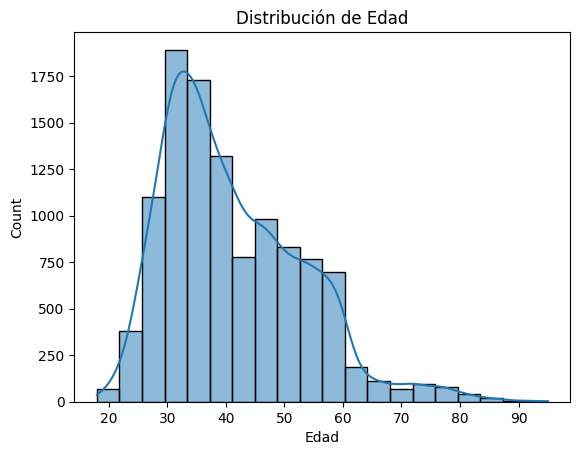

In [31]:
# Histograma de age
sns.histplot(df_bank['age'], bins=20, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.show()

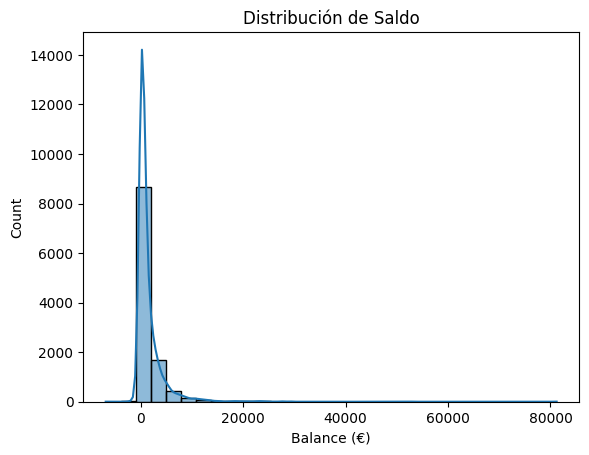

In [32]:
# Histograma y boxplot de balance
sns.histplot(df_bank['balance'], bins=30, kde=True)
plt.title("Distribución de Saldo")
plt.xlabel("Balance (€)")
plt.show()

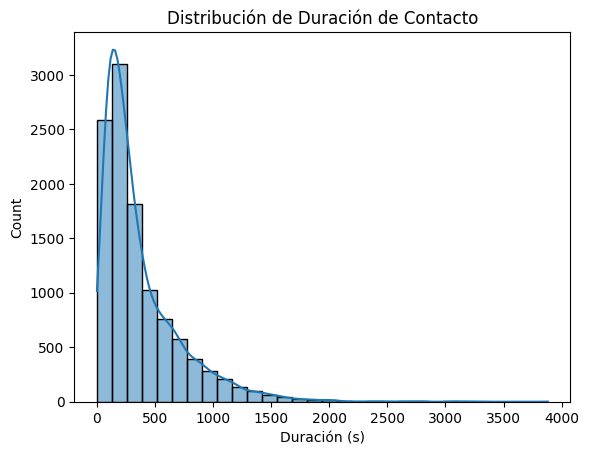

In [34]:
# Histograma de duration
sns.histplot(df_bank['duration'], bins=30, kde=True)
plt.title("Distribución de Duración de Contacto")
plt.xlabel("Duración (s)")
plt.show()

Gráficos para variables categóricas

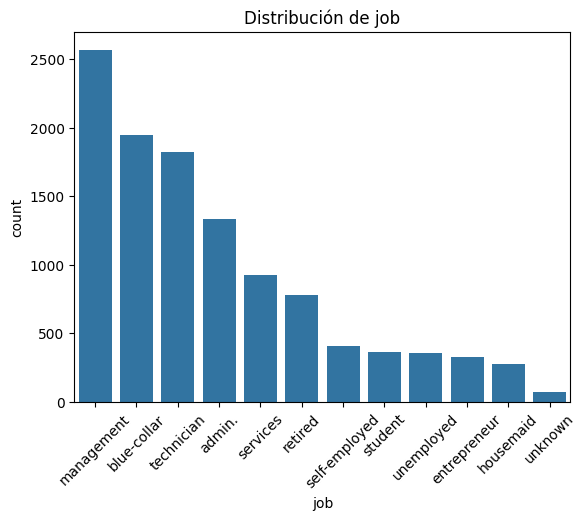

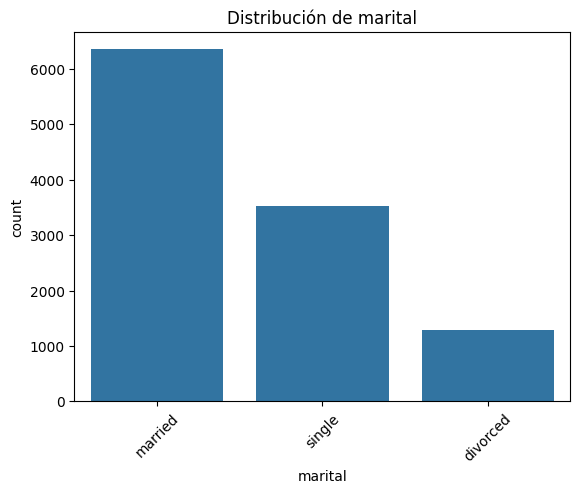

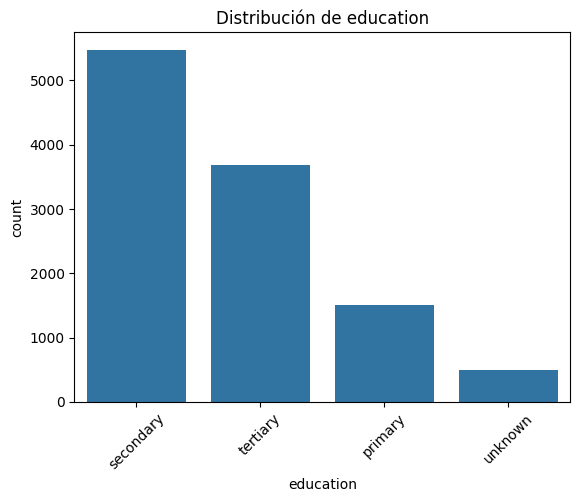

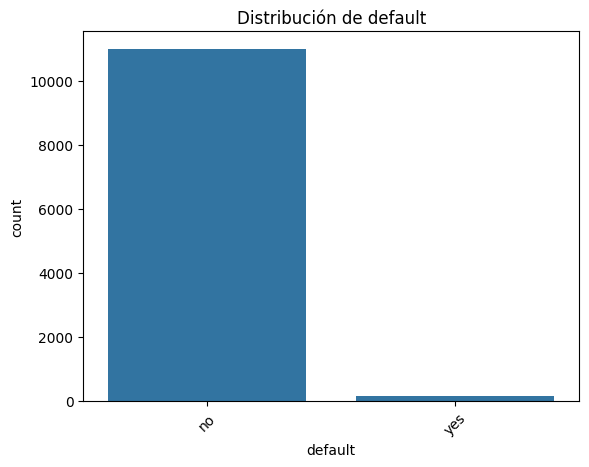

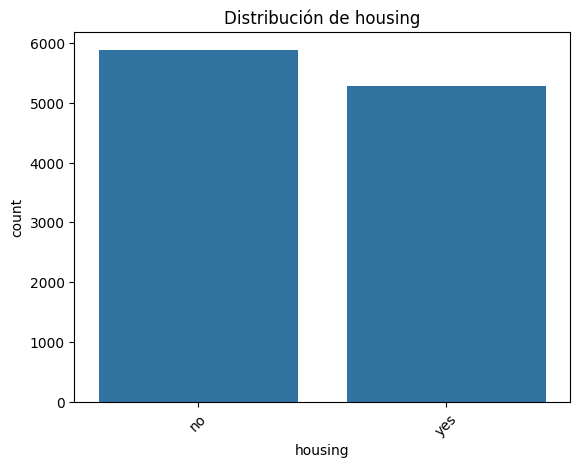

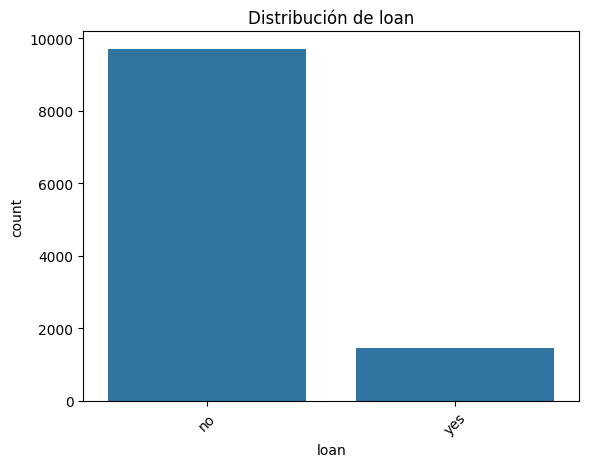

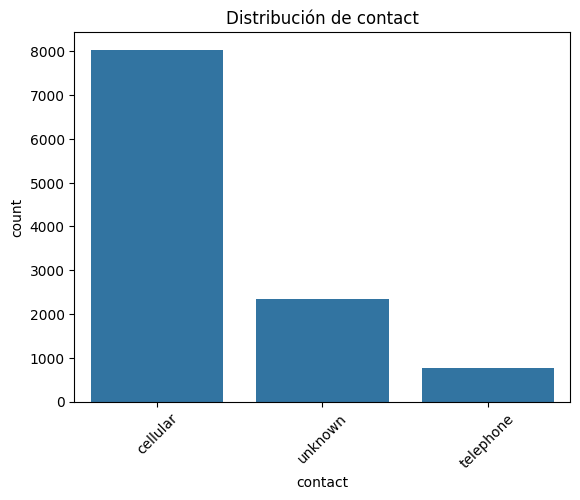

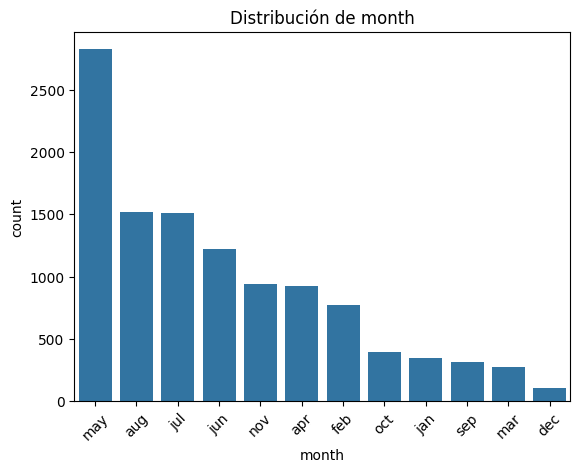

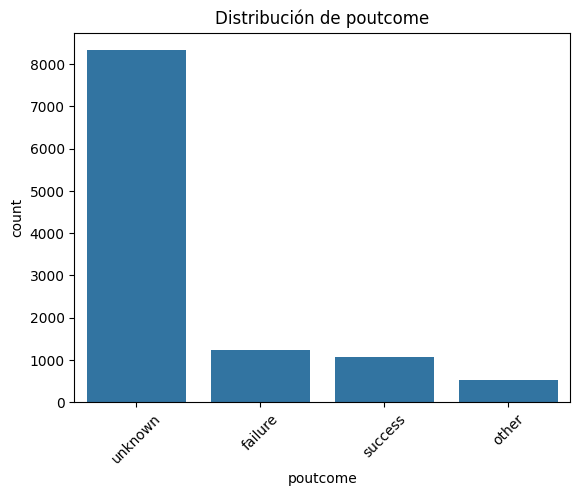

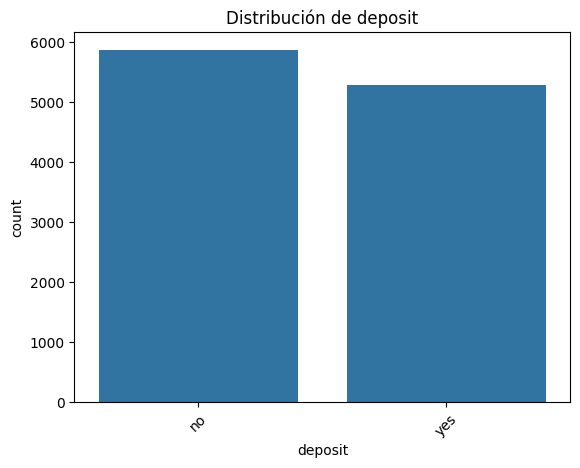

In [37]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']

for col in categorical_cols:
    sns.countplot(x=col, data=df_bank, order=df_bank[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

Gráficos de relaciones entre variables

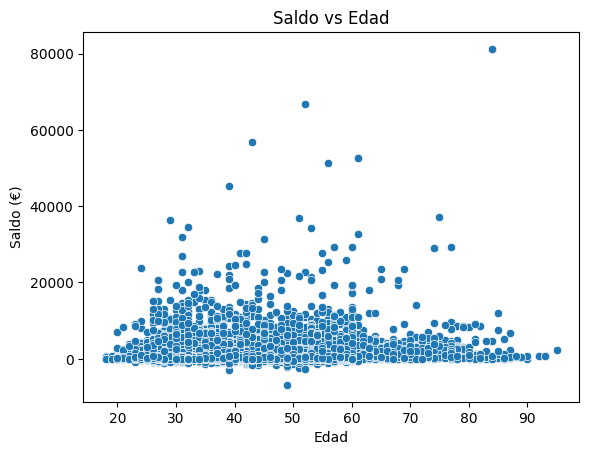

In [44]:
# Scatterplot balance vs age
sns.scatterplot(x='age', y='balance', data=df_bank)
plt.title("Saldo vs Edad")
plt.xlabel("Edad")
plt.ylabel("Saldo (€)")
plt.show()

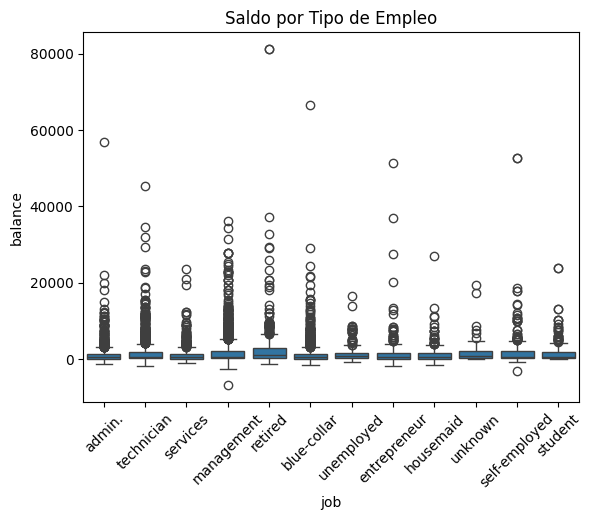

In [39]:
# Boxplot balance por job
sns.boxplot(x='job', y='balance', data=df_bank)
plt.title("Saldo por Tipo de Empleo")
plt.xticks(rotation=45)
plt.show()


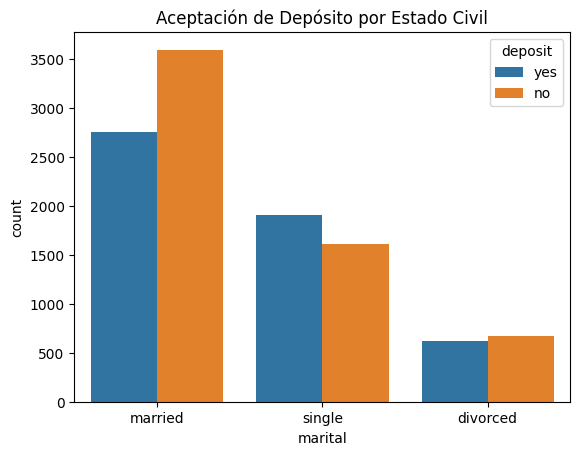

In [41]:
# Barplot apilado deposit vs marital
sns.countplot(x='marital', hue='deposit', data=df_bank)
plt.title("Aceptación de Depósito por Estado Civil")
plt.show()